In [73]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from abc_analysis import abc_analysis

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [74]:
#Загружаем датасет
path = 'Data for Marketing analyst research.csv'
df = pd.read_csv(path, sep = ',')

In [75]:
df.head()


,session_id,user_id,session_datetime,device,marketing_channel_1,marketing_channel_2,session_with_booking
0,384542546,344186915,2017-01-01 00:07:33+03,pc,brand,type-in,0
1,384542869,344187468,2017-01-01 00:19:26+03,mobile,metasearch,trivago,0
2,384543050,344187922,2017-01-01 00:25:53+03,pc,cpc,sem,0
3,384543457,344188772,2017-01-01 00:38:13+03,pc,metasearch,trivago,0
4,384543471,341730859,2017-01-01 00:38:32+03,mobile,brand,type-in,0


In [76]:
df.isna().sum()

session_id              0
user_id                 0
session_datetime        0
device                  0
marketing_channel_1     0
marketing_channel_2     0
session_with_booking    0
dtype: int64

In [77]:
df.duplicated().sum()

0

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427472 entries, 0 to 1427471
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   session_id            1427472 non-null  int64 
 1   user_id               1427472 non-null  int64 
 2   session_datetime      1427472 non-null  object
 3   device                1427472 non-null  object
 4   marketing_channel_1   1427472 non-null  object
 5   marketing_channel_2   1427472 non-null  object
 6   session_with_booking  1427472 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 76.2+ MB


In [79]:
#Добавляем колонку с датой  без +3
df['session_date_day_hour']  = [i.split('+')[0] for i in df['session_datetime']]
df['session_date_day_hour']

0          2017-01-01 00:07:33
1          2017-01-01 00:19:26
2          2017-01-01 00:25:53
3          2017-01-01 00:38:13
4          2017-01-01 00:38:32
                  ...         
1427467    2017-06-30 23:56:55
1427468    2017-06-30 23:57:29
1427469    2017-06-30 23:57:47
1427470    2017-06-30 23:59:23
1427471    2017-06-30 23:59:24
Name: session_date_day_hour, Length: 1427472, dtype: object

In [80]:
#Добавляем колонки с датой по дням
df['session_date_day'] = [i.split(' ')[0] for i in df['session_date_day_hour']]

In [81]:
#Переводим колонки в формат даты 
df['session_date_day_hour'] = pd.to_datetime(df['session_date_day_hour'])
df['session_date_day'] = pd.to_datetime(df['session_date_day'])

<AxesSubplot:xlabel='month', ylabel='session_with_booking'>

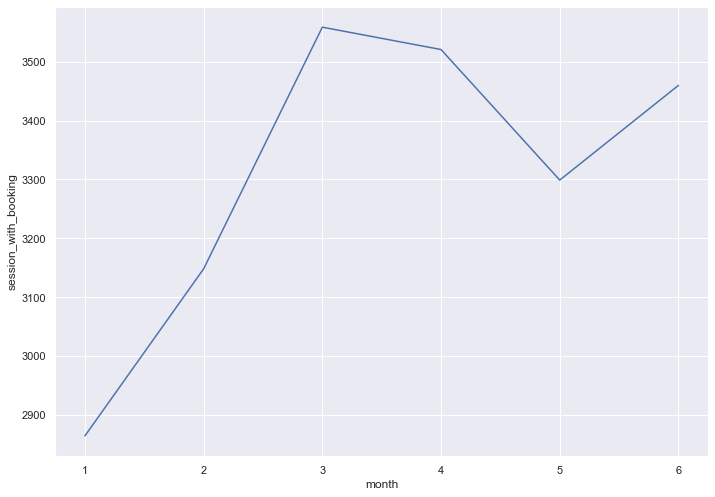

In [82]:
#Посмотрим динамику по месяцам
# Создаем колонку month

df['month'] = df['session_date_day'].dt.month
df_month = df.groupby('month', as_index = False).agg({'session_id': 'count', 'session_with_booking':'sum'})
sns.lineplot (data = df_month, x = 'month', y = 'session_with_booking')
# Как видно из графика месяц с наибольшим числом бронирований - Март

<AxesSubplot:xlabel='month', ylabel='session_id'>

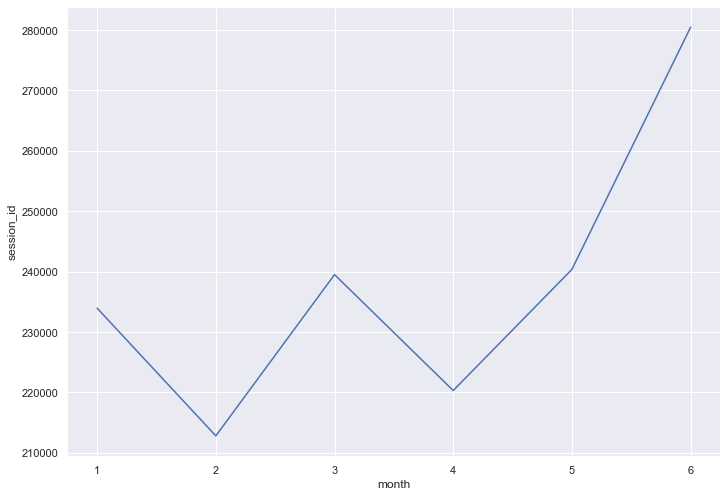

In [83]:
sns.lineplot (data = df_month, x = 'month', y = 'session_id')
#Разбивка по числу всех сессий напротив, показывает сильный рост интереса Май - Июнь, но не означает увеличение конверсии в бронь
# Возможно такая динамика получилась из-за увеличения активности одного из каналов


<AxesSubplot:xlabel='month', ylabel='session_id'>

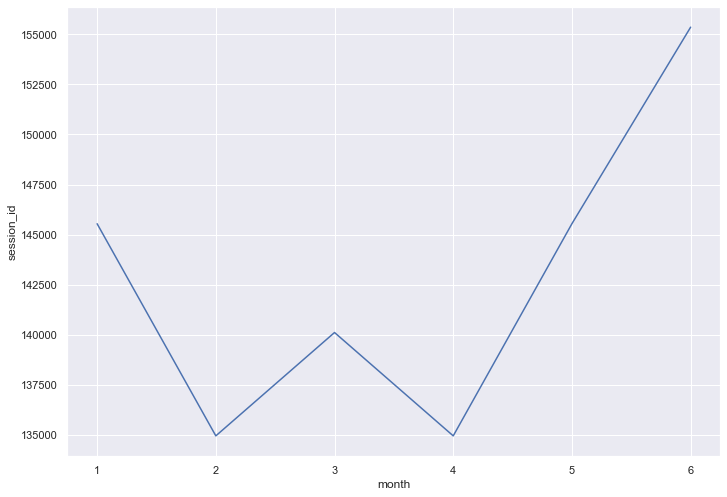

In [84]:
# Попробуем исключить "sem"  канал из выборки
df_month = df.query('marketing_channel_2 != "sem"').groupby('month', as_index = False).agg({'session_id': 'count', 'session_with_booking':'sum'})
sns.lineplot (data = df_month, x = 'month', y = 'session_id')
# В целом динамика схожа, но просадка в апреле больше 

<AxesSubplot:xlabel='weekday', ylabel='session_with_booking'>

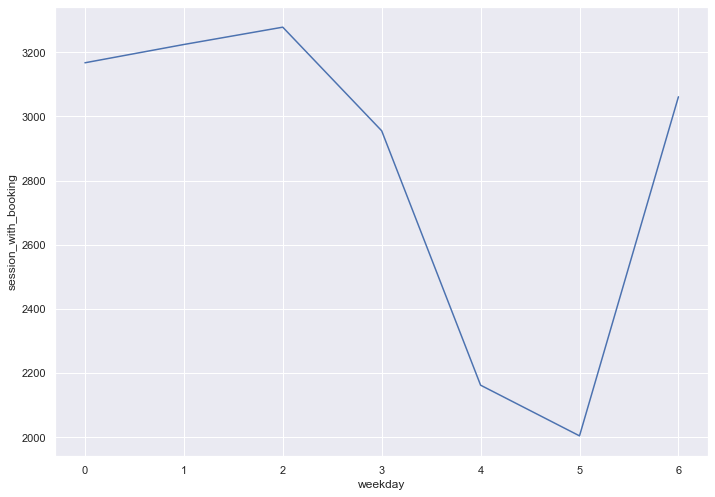

In [85]:
#Проверим , как соотносятся дни недели с кол-ом бронирования
# Создаем колонку с днями недели
df['weekday'] = df['session_date_day'].dt.weekday

#Группируем по дням недели и аггрегируем по числу сессий и сумме сессий с бронированием
df_day_week = df.groupby('weekday', as_index = False).agg({'session_id': 'count', 'session_with_booking':'sum'})
sns.lineplot (data = df_day_week, x = 'weekday', y = 'session_with_booking')

# Очевидно, что пик бронирования приходится на первые три дня недели (Среда  - пик) 

<AxesSubplot:xlabel='weekday', ylabel='session_id'>

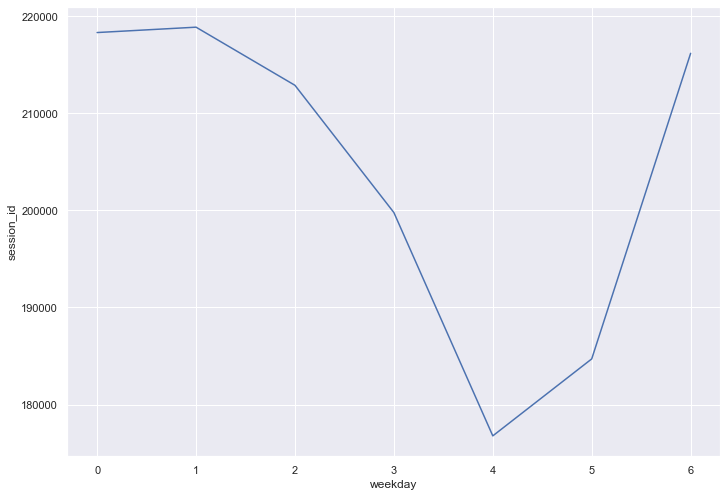

In [86]:
# Разбивка по  всем сессиям, в целом, также корреллирует,  первые два дня недели наиболее активные
sns.lineplot (data = df_day_week, x = 'weekday', y = 'session_id')

In [87]:
#Определяем сколько сессий с конверсией было по каждому каналу  с учетом даты
df_session = df.groupby(['month', 'marketing_channel_2'], as_index = False) \
    .agg({'session_with_booking':'sum'}) \
.sort_values(['month', 'session_with_booking'] , ascending = [True, False] )
df_session

,month,marketing_channel_2,session_with_booking
8,1,type-in,1115
9,1,vital,724
2,1,gotravelunl,263
1,1,email,207
3,1,hc,175
...,...,...,...
60,6,sem,113
55,6,cpa-affiliate,106
65,6,yandex,62
59,6,retargeting,4


<AxesSubplot:xlabel='marketing_channel_1', ylabel='session_id'>

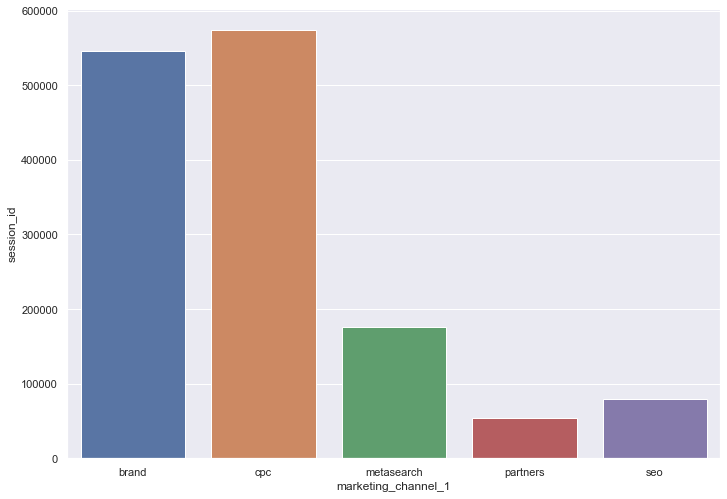

In [88]:
# По числу сессий лидируют каналы CPC 
df_group_channel_1 = df.groupby('marketing_channel_1', as_index = False).agg({'session_id':'count'})
df_group_channel_1 
sns.barplot(data = df_group_channel_1, x = 'marketing_channel_1', y = 'session_id'  )

<AxesSubplot:xlabel='marketing_channel_1', ylabel='session_with_booking'>

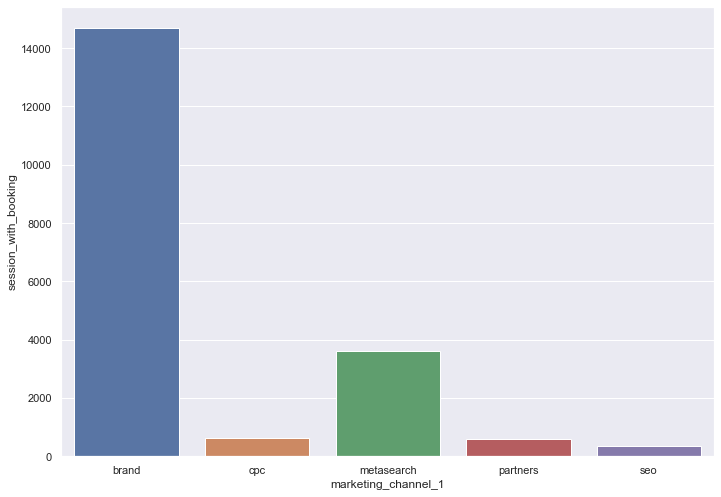

In [89]:
#В тоже время если смотреть на сессии с бронированием , лучшими являются  brand  и metasearch
df_group_channel_1 = df.groupby('marketing_channel_1', as_index = False).agg({'session_with_booking':'sum'})
df_group_channel_1 
sns.barplot(data = df_group_channel_1, x = 'marketing_channel_1', y = 'session_with_booking'  )

<AxesSubplot:xlabel='marketing_channel_2', ylabel='session_with_booking'>

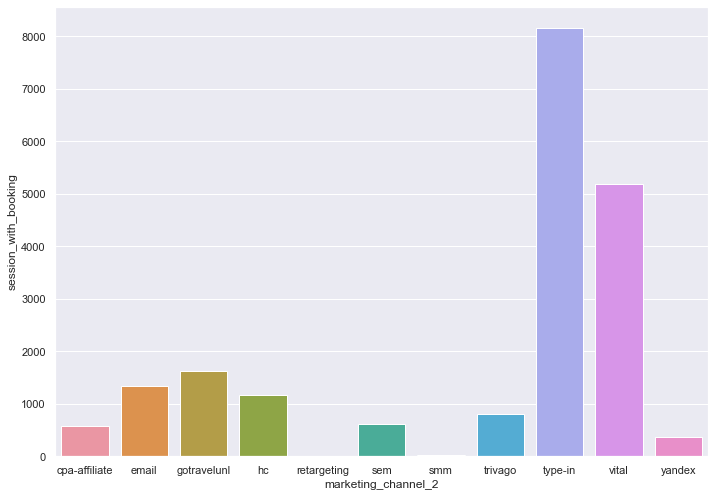

In [90]:
#Определяем сколько сессий с конверсией было по каждому каналу  в общем
df_group_channel_2 = df_session.groupby('marketing_channel_2', as_index = False).agg({'session_with_booking':'sum'})
df_group_channel_2 
sns.barplot(data = df_group_channel_2, x = 'marketing_channel_2', y = 'session_with_booking')

In [91]:
# Добавляем колонку конверсия с разбивкой по каналам и девайсам 
df_marketing_channel = df.groupby(['marketing_channel_1',  'marketing_channel_2','device']).agg({'session_id':'count', 'session_with_booking':'sum'})
df_marketing_channel['CR'] = round(df_marketing_channel['session_with_booking'] / df_marketing_channel['session_id']*100, 2)
df_marketing_channel = df_marketing_channel.sort_values(['CR', 'session_with_booking'], ascending = [False, False]).reset_index()


In [92]:
#Добавляем колонку с ABC анализом  (session_with_booking)

abc = abc_analysis(df_marketing_channel['session_with_booking'])
abc

#Позиция CR
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

#Новая колонка с индексом
cond_list = [df_marketing_channel.index.isin(a_index),
            df_marketing_channel.index.isin(b_index),
            df_marketing_channel.index.isin(c_index)]

choice_list = ['A', 'B', 'C']

df_marketing_channel['abc'] = np.select(cond_list, choice_list)
df_marketing_channel.sort_values(by = ['CR'], ascending = False)
# К сожалению мы не знаем сколько было потрачено на каждый канал, по этому основные критериями будут CR and session_with_booking
#  Можно сделать следующие выводы: Несмотря на меньшие объемы чем brand,  metasearch  имеет хорошую конверсию,
#   в частности gotravelunl mobile 
# Из брендовых каналов стоит выделить type-in и vital
# CPC и SEO - наименее эффективные методы



/Users/nikita/opt/anaconda3/lib/python3.9/site-packages/abc_analysis/abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
/Users/nikita/opt/anaconda3/lib/python3.9/site-packages/abc_analysis/abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


,marketing_channel_1,marketing_channel_2,device,session_id,session_with_booking,CR,abc
0,metasearch,gotravelunl,mobile,11852,1138,9.60,A
1,brand,vital,pc,81007,4574,5.65,A
2,metasearch,gotravelunl,pc,7759,414,5.34,C
3,metasearch,gotravelunl,tablet,1541,79,5.13,C
4,brand,email,pc,39239,1122,2.86,A
5,brand,type-in,mobile,164514,4351,2.64,A
6,brand,vital,tablet,6485,161,2.48,C
7,metasearch,hc,pc,36608,782,2.14,B
9,brand,vital,mobile,23165,451,1.95,B
8,brand,type-in,pc,178719,3486,1.95,A


<AxesSubplot:xlabel='marketing_channel_2', ylabel='CR'>

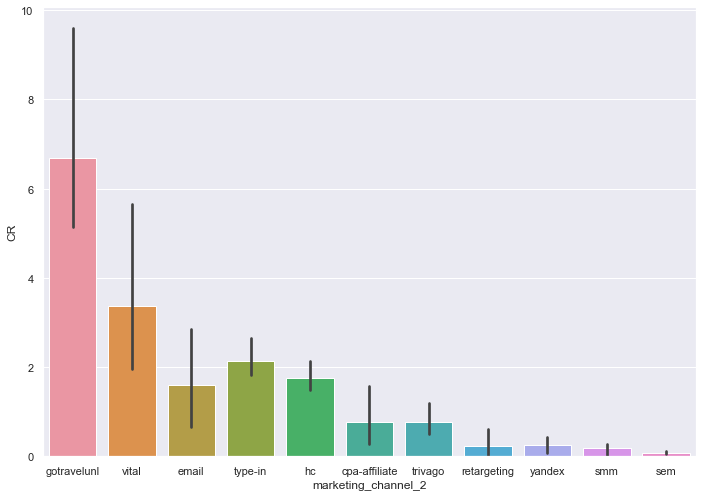

In [93]:
# График для более четкого понимания
sns.barplot(data = df_marketing_channel, x = 'marketing_channel_2', y = 'CR')

In [94]:
#проверим данные на наличие аномалий
#Предположим, что в один session_datetime может быть только одна session_with_booking
df_session = df.groupby(['session_datetime', 'user_id', 'marketing_channel_1','marketing_channel_2'], as_index = False) \
    .agg({'session_with_booking':'count'}) \
.sort_values('session_with_booking' , ascending = False )

# Группировка по каналам, где сессий/конверсий в одно и тоже время было больше 1 
df_session.query('session_with_booking > 1') \
    .groupby(['marketing_channel_1', 'marketing_channel_2'], as_index = False) \
        .agg({'session_with_booking':'count'})
# Возможно, что такое кол-во  сессий было агрегировано системой с ошибкой,  наибольшее число в канале sem

,marketing_channel_1,marketing_channel_2,session_with_booking
0,brand,email,4
1,brand,vital,19
2,cpc,sem,65
3,metasearch,gotravelunl,2
4,metasearch,hc,3
5,metasearch,trivago,2
6,partners,cpa-affiliate,1
7,seo,yandex,1


In [95]:
# Посмотрим общую разбивку по девайсам
df_device_data = df.groupby(['device']).agg({'session_id': 'count', 'session_with_booking':'sum'}) 
df_device_data
# Пользователи все же предпочитают ПК для просмотра и бронирования, планшеты имеют наименьший вес

,session_id,session_with_booking
device,,
mobile,401049,6784
pc,926480,12281
tablet,99943,786


In [96]:
#Найдем пользователей с наибольшим value 

user_value = df.groupby('user_id', as_index = False).agg({'session_id':'count', 'session_with_booking':'sum'}) \
    .sort_values('session_with_booking', ascending = False)
user_value
#  Будем считать, что пользователь с бронированием 2  и больше  - ценный клиент 
user_max_value = user_value.query('session_with_booking >= 2')
user_max_value_id = user_max_value['user_id']
user_max_value['user_id']

91327     319532782
144592    342816964
128653    339098657
62644     299787728
37950     250119897
            ...    
671989    357963454
70398     305837429
82351     313260619
44485     271707986
103489    327994537
Name: user_id, Length: 1559, dtype: int64

In [97]:
# Объединяем основной датасет с юзерами с высоким value, и группируем по каналам
df_merge_max_value = df.merge(user_max_value_id, how= 'inner', on = 'user_id')
df_merge_max_value.groupby(['marketing_channel_1', 'marketing_channel_2']).agg({'session_id':'count','session_with_booking':'sum'}) \
    .reset_index().rename(columns = {'session_id': 'number_of_sessions', 'session_with_booking':'number_of_sessions_with_booking'}) \
        .sort_values('number_of_sessions_with_booking', ascending = False)
#Как можно заметить, доля брeндовых каналов преобладает среди постоянных клиентов, что логично

,marketing_channel_1,marketing_channel_2,number_of_sessions,number_of_sessions_with_booking
2,brand,type-in,5625,2738
3,brand,vital,3222,1928
0,brand,email,805,264
6,metasearch,gotravelunl,289,165
9,partners,cpa-affiliate,338,164
7,metasearch,hc,254,65
10,seo,yandex,183,57
5,cpc,sem,65,22
8,metasearch,trivago,44,22
4,cpc,retargeting,11,3
